In [122]:
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [123]:
# Generate RSA key pair
key = RSA.generate(2048)
private_key = key.export_key()
public_key = key.publickey().export_key()

# Save keys to files (for future decryption)
with open('private.pem', 'wb') as private_file:
    private_file.write(private_key)

with open('public.pem', 'wb') as public_file:
    public_file.write(public_key)

# Load public key for encryption
recipient_key = RSA.import_key(open('public.pem').read())
cipher_rsa = PKCS1_OAEP.new(recipient_key)


In [124]:
# Read and encrypt image
image_path = 'im2.jpg'  # Replace with the path to your image
image = cv2.imread(image_path)

# Get image shape
rows, cols, channels = image.shape

# Encrypt the image
encrypted_image_flat = np.zeros((rows * cols * channels,), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        pixel = image[i, j]
        encrypted_pixel = cipher_rsa.encrypt(pixel.tobytes())
        start_index = (i * cols + j) * channels
        for c in range(channels):
            encrypted_image_flat[start_index + c] = encrypted_pixel[c]

# Reshape the flat array to the original image dimensions
encrypted_image = encrypted_image_flat.reshape((rows, cols, channels))

# Save encrypted image
cv2.imwrite('encrypted_image.jpg', encrypted_image)

True

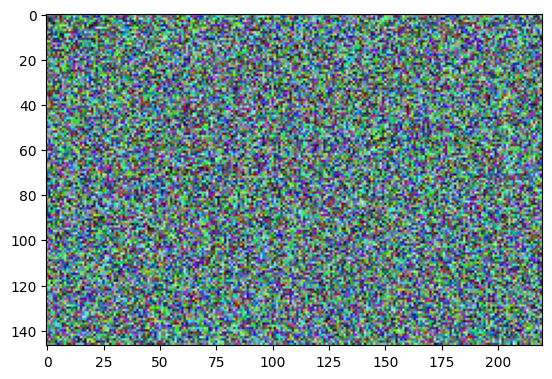

In [125]:
plt.imshow(encrypted_image, cmap="gray")

In [126]:
from Crypto.Cipher import PKCS1_OAEP
from Crypto.PublicKey import RSA
import cv2
import numpy as np

# Load private key for decryption
private_key = RSA.import_key(open('private.pem').read())
cipher_rsa = PKCS1_OAEP.new(private_key)

# Load the encrypted image
encrypted_image = cv2.imread('encrypted_image.jpg')

# Get image shape
rows, cols, channels = encrypted_image.shape

# Decrypt the image
decrypted_image_flat = np.zeros((rows * cols * channels,), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        encrypted_pixel = encrypted_image[i, j]
        decrypted_pixel = cipher_rsa.decrypt(encrypted_pixel.tobytes())
        start_index = (i * cols + j) * channels
        for c in range(channels):
            decrypted_image_flat[start_index + c] = decrypted_pixel[c]

# Reshape the flat array to the original image dimensions
decrypted_image = decrypted_image_flat.reshape((rows, cols, channels))

# Save decrypted image
cv2.imwrite('decrypted_image.jpg', decrypted_image)


ValueError: Ciphertext with incorrect length.

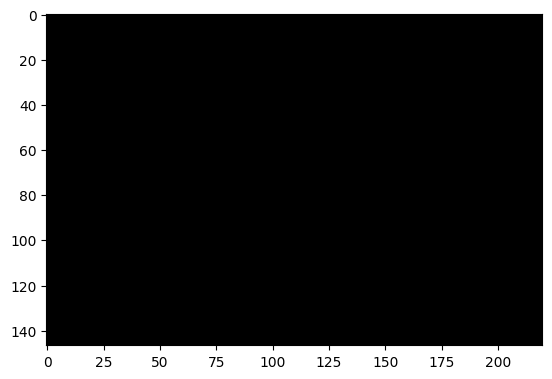

In [ ]:
plt.imshow(decrypted_image, cmap="gray")